In [1]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import seaborn as sns
pal = sns.color_palette("hls", 10)

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [7]:
def load_and_resize_images(folder_path, target_size):

    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    dataset = ImageFolder(folder_path, transform=transform)
    images = []
    labels = []

    for image, label in dataset:
        images.append(image.numpy().flatten())
        labels.append(dataset.classes[label])
    return images, labels

training_folder = 'data/Training'
testing_folder = 'data/Testing'

target_size = (128, 128)

train_images, train_labels = load_and_resize_images(training_folder, target_size)

test_images, test_labels = load_and_resize_images(testing_folder, target_size)

train_df = pd.DataFrame(train_images)
train_df['class'] = train_labels

test_df = pd.DataFrame(test_images)
test_df['class'] = test_labels

In [8]:
pca = PCA(n_components=3)
transformed_features = pca.fit_transform(train_df[train_df.columns[:-1]])

In [9]:
mapping = {'glioma': 0,
           'meningioma': 1,
           'notumor': 2,
           'pituitary': 3}

features = pd.DataFrame(transformed_features, columns=['feature_1', 'feature_2', 'feature_3'])
features['class'] = train_df['class'].apply(lambda c: mapping[c]).values

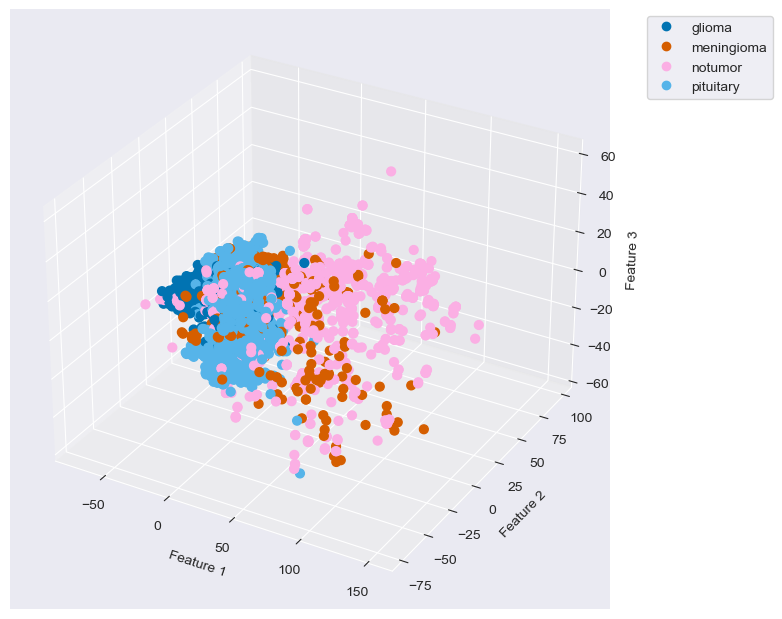

In [10]:
class_labels = train_df['class'].unique()
class_to_color = {class_label: sns.color_palette("husl", len(class_labels))[i] for i, class_label in enumerate(class_labels)}
cmap = ListedColormap(sns.color_palette("colorblind").as_hex())

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(features['feature_1'], features['feature_2'], features['feature_3'],
                s=40, c=features['class'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

legend_labels = [class_label for class_label in class_labels]
plt.legend(handles=sc.legend_elements()[0], labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
